# Base and res spec h-bond

In [68]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import csv
import os
import warnings
warnings.filterwarnings('ignore')

input_files = os.path.join('DNMT3B')

cgc=pd.read_csv(input_files+"/3B-CGC.int.hbonds", sep="\t", header=None)
cgc.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]

cgc['resid_a'] = cgc['resid_a'] + 570

cgc_inter = cgc.loc[((cgc["chain_a"] == "A") & (cgc["chain_b"] == "B")) | 
                    ((cgc["chain_a"] == "A") & (cgc["chain_b"] == "C")) ]

cgc_spec = cgc_inter.drop(cgc_inter.index[cgc_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

cgc_spec_res = cgc_spec.drop(cgc_spec.index[cgc_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])


cgc_spec_res["resname_a"] = cgc_spec_res["resname_a"].astype(str) + cgc_spec_res["resid_a"].astype(str)
#
cgc_spec_res=cgc_spec_res.drop(columns=['resid_a'])
cgc_spec_res['Type'] = '3B:CGC'
#
cgc_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
74,hbond,A,B,ARG661,DA,291,NH2,N9,3B:CGC
75,hbond,A,B,ARG661,DC,290,NH2,O2,3B:CGC
132,hbond,A,C,ARG731,DC,298,NE,O2,3B:CGC
138,hbond,A,C,ARG733,DC,298,NH2,O2,3B:CGC
170,hbond,A,B,LYS777,DG,285,NZ,O6,3B:CGC
...,...,...,...,...,...,...,...,...,...
841949,hbond,A,C,ARG733,DC,298,NE,N3,3B:CGC
841951,hbond,A,C,ARG733,DC,298,NH2,O2,3B:CGC
841982,hbond,A,B,LYS777,DG,285,NZ,O6,3B:CGC
842059,hbond,A,C,GLU697,DC,298,OE1,N4,3B:CGC


In [69]:
#Function for convert residue number of nucleotides to nucleotide position
def nucleotide_pos(df):
    df['resid_b'] = df['resid_b'].astype(str).str.replace('284',"(+5')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('285',"(+4')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('286',"(+3')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('287',"(+2')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('288',"(+1')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('289',"(0')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('290',"(-1')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('291',"(-2')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('292',"(-3')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('293',"(-4')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('294',"(-4)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('295',"(-3)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('296',"(-2)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('297',"(-1)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('298',"(0)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('299',"(+1)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('300',"(+2)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('301',"(+3)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('302',"(+4)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('303',"(+5)")


In [70]:
nucleotide_pos(cgc_spec_res)
cgc_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
74,hbond,A,B,ARG661,DA,(-2'),NH2,N9,3B:CGC
75,hbond,A,B,ARG661,DC,(-1'),NH2,O2,3B:CGC
132,hbond,A,C,ARG731,DC,(0),NE,O2,3B:CGC
138,hbond,A,C,ARG733,DC,(0),NH2,O2,3B:CGC
170,hbond,A,B,LYS777,DG,(+4'),NZ,O6,3B:CGC
...,...,...,...,...,...,...,...,...,...
841949,hbond,A,C,ARG733,DC,(0),NE,N3,3B:CGC
841951,hbond,A,C,ARG733,DC,(0),NH2,O2,3B:CGC
841982,hbond,A,B,LYS777,DG,(+4'),NZ,O6,3B:CGC
842059,hbond,A,C,GLU697,DC,(0),OE1,N4,3B:CGC


In [71]:
cgc_spec_res['resname_a'] = cgc_spec_res['resname_a'].str.title()

#discarding flipped cytosine
cgc_spec_res=cgc_spec_res.drop(cgc_spec_res.loc[cgc_spec_res['resid_b']=="(0)"].index)
#
cgc_spec_res['pairwise'] = cgc_spec_res['resname_a'].str.cat(cgc_spec_res['resid_b'],sep="-")
cgc_spec_res['pair_freq'] = cgc_spec_res.groupby('pairwise')['pairwise'].transform('count')
#
cgc_spec_res['atom_atom'] = cgc_spec_res['resname_a']+"-"+ cgc_spec_res['atom_a']+"-"+ cgc_spec_res['resid_b'] +"-"+ cgc_spec_res['atom_b']
cgc_spec_res['atom_atom_freq'] = cgc_spec_res.groupby('atom_atom')['atom_atom'].transform('count')
#
cgc_spec_res


,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq
74,hbond,A,B,Arg661,DA,(-2'),NH2,N9,3B:CGC,Arg661-(-2'),538,Arg661-NH2-(-2')-N9,282
75,hbond,A,B,Arg661,DC,(-1'),NH2,O2,3B:CGC,Arg661-(-1'),3591,Arg661-NH2-(-1')-O2,3194
170,hbond,A,B,Lys777,DG,(+4'),NZ,O6,3B:CGC,Lys777-(+4'),2072,Lys777-NZ-(+4')-O6,1708
186,hbond,A,C,Lys785,DG,(-1),NZ,O6,3B:CGC,Lys785-(-1),550,Lys785-NZ-(-1)-O6,342
341,hbond,A,B,Arg661,DC,(-1'),NH2,O2,3B:CGC,Arg661-(-1'),3591,Arg661-NH2-(-1')-O2,3194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
841719,hbond,A,B,Lys777,DG,(+4'),NZ,O6,3B:CGC,Lys777-(+4'),2072,Lys777-NZ-(+4')-O6,1708
841720,hbond,A,C,Lys777,DT,(+3),NZ,O4,3B:CGC,Lys777-(+3),790,Lys777-NZ-(+3)-O4,790
841885,hbond,A,B,Asn656,DA,(-2'),ND2,N3,3B:CGC,Asn656-(-2'),2776,Asn656-ND2-(-2')-N3,2776
841893,hbond,A,B,Arg661,DC,(-1'),NH2,O2,3B:CGC,Arg661-(-1'),3591,Arg661-NH2-(-1')-O2,3194


In [72]:
cgc_compl = cgc_spec_res[cgc_spec_res['resid_b'].isin(("(+3')","(+2')","(+1')"))]
cgc_compl['Strand'] = 'CGC-compl'

cgc_target = cgc_spec_res[cgc_spec_res['resid_b'].isin(("(+3)","(+2)","(+1)"))]
cgc_target['Strand'] = 'CGC-target'

cgc_all=cgc_compl.append(cgc_target)
cgc_all=cgc_all.sort_values(('atom_atom_freq') , ascending=False)
cgc_all

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq,Strand
841720,hbond,A,C,Lys777,DT,(+3),NZ,O4,3B:CGC,Lys777-(+3),790,Lys777-NZ-(+3)-O4,790,CGC-target
218201,hbond,A,C,Lys777,DT,(+3),NZ,O4,3B:CGC,Lys777-(+3),790,Lys777-NZ-(+3)-O4,790,CGC-target
216642,hbond,A,C,Lys777,DT,(+3),NZ,O4,3B:CGC,Lys777-(+3),790,Lys777-NZ-(+3)-O4,790,CGC-target
215845,hbond,A,C,Lys777,DT,(+3),NZ,O4,3B:CGC,Lys777-(+3),790,Lys777-NZ-(+3)-O4,790,CGC-target
211921,hbond,A,C,Lys777,DT,(+3),NZ,O4,3B:CGC,Lys777-(+3),790,Lys777-NZ-(+3)-O4,790,CGC-target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490231,hbond,A,B,Lys785,DC,(+1'),NZ,N4,3B:CGC,Lys785-(+1'),2,Lys785-NZ-(+1')-N4,2,CGC-compl
607178,hbond,A,B,Ser778,DA,(+3'),OG,N6,3B:CGC,Ser778-(+3'),7,Ser778-OG-(+3')-N6,2,CGC-compl
757641,hbond,A,C,Asn779,DC,(+2),OD1,N4,3B:CGC,Asn779-(+2),5,Asn779-OD1-(+2)-N4,1,CGC-target
711201,hbond,A,B,Gln787,DA,(+3'),NE2,N7,3B:CGC,Gln787-(+3'),1,Gln787-NE2-(+3')-N7,1,CGC-compl


In [108]:
cgc_sig = cgc_all[cgc_all['atom_atom_freq'] > (cgc_spec_res['atom_atom_freq'].max())*0.1] 

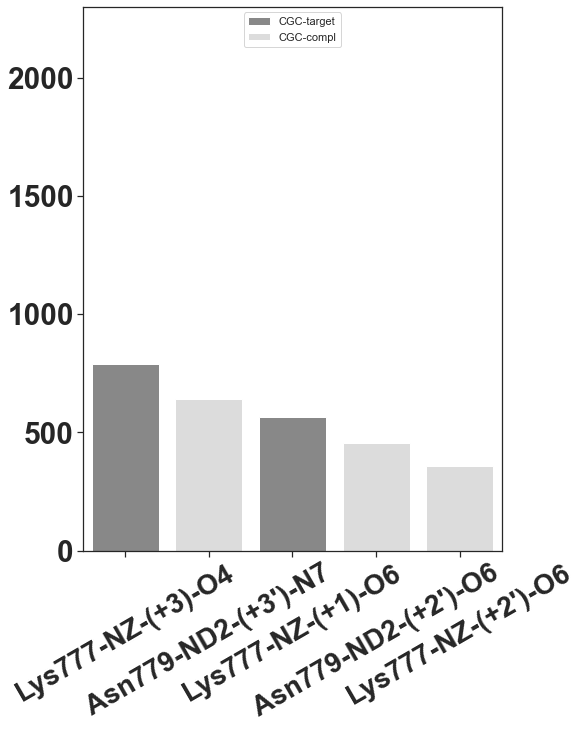

In [109]:
sns.set(style="ticks")

palet=['#888888', '#DCDCDC']

plt.figure(figsize=(7.5,10))
ax = sns.barplot(x="atom_atom", y="atom_atom_freq", hue="Strand", palette=palet, 
                 #order=axis_order,
                 dodge=False,
                 data=cgc_sig)
plt.xticks(rotation=30)
plt.legend(loc='upper center')
plt.xticks(fontsize=28, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.ylim(ymax = 2300, ymin = 0)
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('',fontsize=15, fontweight='bold')
plt.title("",fontsize=20, fontweight='bold')

plt.savefig("Comp-3b-cgc-atom-atom-c-flank-f.pdf", dpi=600, bbox_inches='tight', format="pdf")


## CGG

In [44]:
cgg=pd.read_csv(input_files+"/3B-CGG.int.hbonds", sep="\t", header=None)
cgg.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]

cgg['resid_a'] = cgg['resid_a'] + 570

cgg_inter = cgg.loc[((cgg["chain_a"] == "A") & (cgg["chain_b"] == "B")) | 
                    ((cgg["chain_a"] == "A") & (cgg["chain_b"] == "C")) ]

cgg_spec = cgg_inter.drop(cgg_inter.index[cgg_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

cgg_spec_res = cgg_spec.drop(cgg_spec.index[cgg_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])


cgg_spec_res["resname_a"] = cgg_spec_res["resname_a"].astype(str) + cgg_spec_res["resid_a"].astype(str)
#
cgg_spec_res=cgg_spec_res.drop(columns=['resid_a'])
cgg_spec_res['Type'] = '3B:CGG'
#
nucleotide_pos(cgg_spec_res)
cgg_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
67,hbond,A,B,ASN656,DA,(-2'),ND2,N3,3B:CGG
73,hbond,A,B,ARG661,DC,(-1'),NH2,O2,3B:CGG
127,hbond,A,C,ARG731,DC,(0),NE,O2,3B:CGG
130,hbond,A,C,ARG731,DC,(0),NH2,O2,3B:CGG
133,hbond,A,C,ARG733,DC,(0),NE,N3,3B:CGG
...,...,...,...,...,...,...,...,...,...
839218,hbond,A,C,LYS777,DG,(+2),NZ,N7,3B:CGG
839228,hbond,A,C,LYS785,DT,(-2),NZ,O4,3B:CGG
839291,hbond,A,B,ASN779,DC,(+2'),ND2,N4,3B:CGG
839306,hbond,A,C,GLU697,DC,(0),OE1,N4,3B:CGG


In [45]:
cgg_spec_res['resname_a'] = cgg_spec_res['resname_a'].str.title()

#discarding flipped cytosine
cgg_spec_res=cgg_spec_res.drop(cgg_spec_res.loc[cgg_spec_res['resid_b']=="(0)"].index)
#
cgg_spec_res['pairwise'] = cgg_spec_res['resname_a'].str.cat(cgg_spec_res['resid_b'],sep="-")
cgg_spec_res['pair_freq'] = cgg_spec_res.groupby('pairwise')['pairwise'].transform('count')
#
cgg_spec_res['atom_atom'] = cgg_spec_res['resname_a']+"-"+ cgg_spec_res['atom_a']+"-"+ cgg_spec_res['resid_b'] +"-"+ cgg_spec_res['atom_b']
cgg_spec_res['atom_atom_freq'] = cgg_spec_res.groupby('atom_atom')['atom_atom'].transform('count')
#
cgg_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq
67,hbond,A,B,Asn656,DA,(-2'),ND2,N3,3B:CGG,Asn656-(-2'),1841,Asn656-ND2-(-2')-N3,1841
73,hbond,A,B,Arg661,DC,(-1'),NH2,O2,3B:CGG,Arg661-(-1'),2842,Arg661-NH2-(-1')-O2,2652
159,hbond,A,C,Gln772,DG,(-1),NE2,N7,3B:CGG,Gln772-(-1),4,Gln772-NE2-(-1)-N7,4
164,hbond,A,C,Lys777,DG,(+1),NZ,N7,3B:CGG,Lys777-(+1),1511,Lys777-NZ-(+1)-N7,1203
172,hbond,A,B,Lys785,DG,(0'),NZ,N7,3B:CGG,Lys785-(0'),668,Lys785-NZ-(0')-N7,334
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839127,hbond,A,B,Arg661,DA,(-2'),NH2,N3,3B:CGG,Arg661-(-2'),1157,Arg661-NH2-(-2')-N3,679
839217,hbond,A,C,Lys777,DT,(+3),NZ,O4,3B:CGG,Lys777-(+3),627,Lys777-NZ-(+3)-O4,627
839218,hbond,A,C,Lys777,DG,(+2),NZ,N7,3B:CGG,Lys777-(+2),812,Lys777-NZ-(+2)-N7,690
839228,hbond,A,C,Lys785,DT,(-2),NZ,O4,3B:CGG,Lys785-(-2),226,Lys785-NZ-(-2)-O4,226


In [46]:
cgg_compl = cgg_spec_res[cgg_spec_res['resid_b'].isin(("(+3')","(+2')","(+1')"))]
cgg_compl['Strand'] = 'cgg-compl'

cgg_target = cgg_spec_res[cgg_spec_res['resid_b'].isin(("(+3)","(+2)","(+1)"))]
cgg_target['Strand'] = 'cgg-target'

cgg_all=cgg_compl.append(cgg_target)
cgg_all=cgg_all.sort_values(('atom_atom_freq') , ascending=False)
cgg_all

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq,Strand
200856,hbond,A,C,Lys777,DG,(+1),NZ,N7,3B:CGG,Lys777-(+1),1511,Lys777-NZ-(+1)-N7,1203,cgg-target
149398,hbond,A,C,Lys777,DG,(+1),NZ,N7,3B:CGG,Lys777-(+1),1511,Lys777-NZ-(+1)-N7,1203,cgg-target
149916,hbond,A,C,Lys777,DG,(+1),NZ,N7,3B:CGG,Lys777-(+1),1511,Lys777-NZ-(+1)-N7,1203,cgg-target
150179,hbond,A,C,Lys777,DG,(+1),NZ,N7,3B:CGG,Lys777-(+1),1511,Lys777-NZ-(+1)-N7,1203,cgg-target
150450,hbond,A,C,Lys777,DG,(+1),NZ,N7,3B:CGG,Lys777-(+1),1511,Lys777-NZ-(+1)-N7,1203,cgg-target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183762,hbond,A,B,Lys777,DC,(+1'),NZ,N4,3B:CGG,Lys777-(+1'),3,Lys777-NZ-(+1')-N4,3,cgg-compl
570364,hbond,A,B,Asn779,DA,(+3'),ND2,N6,3B:CGG,Asn779-(+3'),407,Asn779-ND2-(+3')-N6,3,cgg-compl
114398,hbond,A,B,Lys777,DC,(+1'),NZ,N4,3B:CGG,Lys777-(+1'),3,Lys777-NZ-(+1')-N4,3,cgg-compl
570101,hbond,A,B,Asn779,DA,(+3'),ND2,N6,3B:CGG,Asn779-(+3'),407,Asn779-ND2-(+3')-N6,3,cgg-compl


In [99]:
cgg_sig = cgg_all[cgg_all['atom_atom_freq'] > (cgg_spec_res['atom_atom_freq'].max())*0.1] 

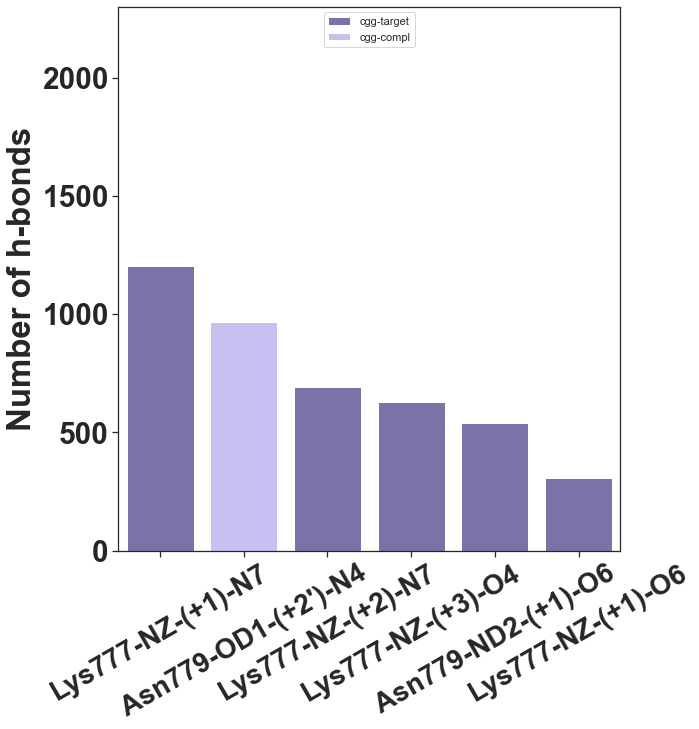

In [110]:
palet=['#746AB0', '#C1B8F9']

plt.figure(figsize=(9,10))
ax = sns.barplot(x="atom_atom", y="atom_atom_freq", hue="Strand", palette=palet, 
                 #order=axis_order,
                 dodge=False,
                 data=cgg_sig)
plt.xticks(rotation=30)
plt.legend(loc='upper center')
plt.xticks(fontsize=28, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.ylim(ymax = 2300, ymin = 0)
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('Number of h-bonds',fontsize=33, fontweight='bold')
plt.title("",fontsize=20, fontweight='bold')

plt.savefig("Comp-3b-cgg-atom-atom-c-flank-f.pdf", dpi=600, bbox_inches='tight', format="pdf")


## CGT

In [53]:
cgt=pd.read_csv(input_files+"/3B-CGT.int.hbonds", sep="\t", header=None)
cgt.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]

cgt['resid_a'] = cgt['resid_a'] + 570

cgt_inter = cgt.loc[((cgt["chain_a"] == "A") & (cgt["chain_b"] == "B")) | 
                    ((cgt["chain_a"] == "A") & (cgt["chain_b"] == "C")) ]

cgt_spec = cgt_inter.drop(cgt_inter.index[cgt_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

cgt_spec_res = cgt_spec.drop(cgt_spec.index[cgt_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])


cgt_spec_res["resname_a"] = cgt_spec_res["resname_a"].astype(str) + cgt_spec_res["resid_a"].astype(str)
#
cgt_spec_res=cgt_spec_res.drop(columns=['resid_a'])
cgt_spec_res['Type'] = '3B:CGT'
#
nucleotide_pos(cgt_spec_res)
cgt_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
76,hbond,A,B,ASN656,DA,(-2'),ND2,N3,3B:CGT
84,hbond,A,B,ARG661,DC,(-1'),NH2,O2,3B:CGT
177,hbond,A,C,LYS777,DG,(+1),NZ,O6,3B:CGT
186,hbond,A,C,LYS785,DA,(-3),NZ,N7,3B:CGT
260,hbond,A,C,GLU697,DC,(0),OE1,N4,3B:CGT
...,...,...,...,...,...,...,...,...,...
842885,hbond,A,C,ARG733,DC,(0),NH2,O2,3B:CGT
842917,hbond,A,B,LYS777,DG,(+4'),NZ,O6,3B:CGT
842918,hbond,A,C,LYS777,DT,(+3),NZ,O4,3B:CGT
842985,hbond,A,B,ASN779,DC,(+1'),OD1,N4,3B:CGT


In [54]:
cgt_spec_res['resname_a'] = cgt_spec_res['resname_a'].str.title()

#discarding flipped cytosine
cgt_spec_res=cgt_spec_res.drop(cgt_spec_res.loc[cgt_spec_res['resid_b']=="(0)"].index)
#
cgt_spec_res['pairwise'] = cgt_spec_res['resname_a'].str.cat(cgt_spec_res['resid_b'],sep="-")
cgt_spec_res['pair_freq'] = cgt_spec_res.groupby('pairwise')['pairwise'].transform('count')
#
cgt_spec_res['atom_atom'] = cgt_spec_res['resname_a']+"-"+ cgt_spec_res['atom_a']+"-"+ cgt_spec_res['resid_b'] +"-"+ cgt_spec_res['atom_b']
cgt_spec_res['atom_atom_freq'] = cgt_spec_res.groupby('atom_atom')['atom_atom'].transform('count')
#
cgt_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq
76,hbond,A,B,Asn656,DA,(-2'),ND2,N3,3B:CGT,Asn656-(-2'),2325,Asn656-ND2-(-2')-N3,2325
84,hbond,A,B,Arg661,DC,(-1'),NH2,O2,3B:CGT,Arg661-(-1'),3904,Arg661-NH2-(-1')-O2,2998
177,hbond,A,C,Lys777,DG,(+1),NZ,O6,3B:CGT,Lys777-(+1),1155,Lys777-NZ-(+1)-O6,1086
186,hbond,A,C,Lys785,DA,(-3),NZ,N7,3B:CGT,Lys785-(-3),35,Lys785-NZ-(-3)-N7,34
343,hbond,A,B,Asn656,DA,(-2'),ND2,N3,3B:CGT,Asn656-(-2'),2325,Asn656-ND2-(-2')-N3,2325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842827,hbond,A,B,Arg661,DC,(-1'),NH2,O2,3B:CGT,Arg661-(-1'),3904,Arg661-NH2-(-1')-O2,2998
842828,hbond,A,B,Arg661,DA,(-2'),NH2,N3,3B:CGT,Arg661-(-2'),778,Arg661-NH2-(-2')-N3,479
842917,hbond,A,B,Lys777,DG,(+4'),NZ,O6,3B:CGT,Lys777-(+4'),1415,Lys777-NZ-(+4')-O6,1206
842918,hbond,A,C,Lys777,DT,(+3),NZ,O4,3B:CGT,Lys777-(+3),667,Lys777-NZ-(+3)-O4,667


In [55]:
cgt_compl = cgt_spec_res[cgt_spec_res['resid_b'].isin(("(+3')","(+2')","(+1')"))]
cgt_compl['Strand'] = 'cgt-compl'

cgt_target = cgt_spec_res[cgt_spec_res['resid_b'].isin(("(+3)","(+2)","(+1)"))]
cgt_target['Strand'] = 'cgt-target'

cgt_all=cgt_compl.append(cgt_target)
cgt_all=cgt_all.sort_values(('atom_atom_freq') , ascending=False)
cgt_all

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq,Strand
421062,hbond,A,B,Asn779,DA,(+2'),OD1,N6,3B:CGT,Asn779-(+2'),2129,Asn779-OD1-(+2')-N6,1140,cgt-compl
363251,hbond,A,B,Asn779,DA,(+2'),OD1,N6,3B:CGT,Asn779-(+2'),2129,Asn779-OD1-(+2')-N6,1140,cgt-compl
362984,hbond,A,B,Asn779,DA,(+2'),OD1,N6,3B:CGT,Asn779-(+2'),2129,Asn779-OD1-(+2')-N6,1140,cgt-compl
586768,hbond,A,B,Asn779,DA,(+2'),OD1,N6,3B:CGT,Asn779-(+2'),2129,Asn779-OD1-(+2')-N6,1140,cgt-compl
587025,hbond,A,B,Asn779,DA,(+2'),OD1,N6,3B:CGT,Asn779-(+2'),2129,Asn779-OD1-(+2')-N6,1140,cgt-compl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791116,hbond,A,B,Asn779,DA,(+3'),ND2,N6,3B:CGT,Asn779-(+3'),710,Asn779-ND2-(+3')-N6,5,cgt-compl
256766,hbond,A,B,Lys777,DA,(+2'),NZ,N6,3B:CGT,Lys777-(+2'),3,Lys777-NZ-(+2')-N6,3,cgt-compl
278468,hbond,A,B,Lys777,DA,(+2'),NZ,N6,3B:CGT,Lys777-(+2'),3,Lys777-NZ-(+2')-N6,3,cgt-compl
253150,hbond,A,B,Lys777,DA,(+2'),NZ,N6,3B:CGT,Lys777-(+2'),3,Lys777-NZ-(+2')-N6,3,cgt-compl


In [101]:
cgt_sig = cgt_all[cgt_all['atom_atom_freq'] > (cgt_spec_res['atom_atom_freq'].max())*0.1] 

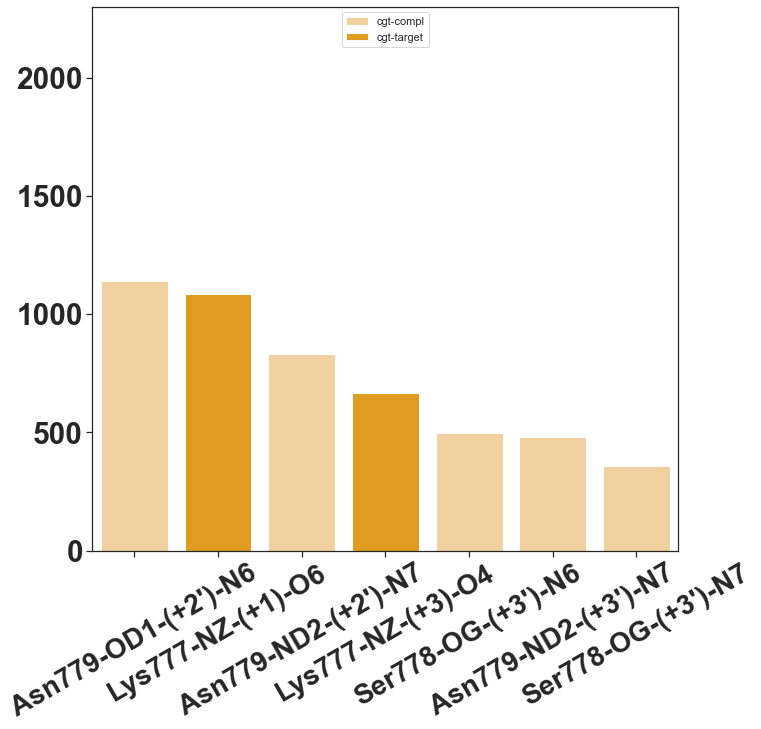

In [111]:
#palet=['#C71585','#DCDCDC', 'orange', 'lightseagreen']
palet=['#FFD491','orange']

plt.figure(figsize=(10.5,10))
ax = sns.barplot(x="atom_atom", y="atom_atom_freq", hue="Strand", palette=palet, 
                 #order=axis_order,
                 dodge=False,
                 data=cgt_sig)
plt.xticks(rotation=30)
plt.legend(loc='upper center')
plt.xticks(fontsize=28, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.ylim(ymax = 2300, ymin = 0)
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('',fontsize=15, fontweight='bold')
plt.title("",fontsize=20, fontweight='bold')

plt.savefig("Comp-3b-cgt-atom-atom-c-flank-f.pdf", dpi=600, bbox_inches='tight', format="pdf")


## CGA

In [60]:
cga=pd.read_csv(input_files+"/3B-CGA.int.hbonds", sep="\t", header=None)
cga.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]

cga['resid_a'] = cga['resid_a'] + 570

cga_inter = cga.loc[((cga["chain_a"] == "A") & (cga["chain_b"] == "B")) | 
                    ((cga["chain_a"] == "A") & (cga["chain_b"] == "C")) ]

cga_spec = cga_inter.drop(cga_inter.index[cga_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

cga_spec_res = cga_spec.drop(cga_spec.index[cga_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])


cga_spec_res["resname_a"] = cga_spec_res["resname_a"].astype(str) + cga_spec_res["resid_a"].astype(str)
#
cga_spec_res=cga_spec_res.drop(columns=['resid_a'])
cga_spec_res['Type'] = '3B:CGA'
#
nucleotide_pos(cga_spec_res)
cga_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
71,hbond,A,B,ASN656,DA,(-2'),ND2,N3,3B:CGA
78,hbond,A,B,ARG661,DC,(-1'),NH2,O2,3B:CGA
136,hbond,A,C,ARG731,DC,(0),NE,O2,3B:CGA
141,hbond,A,C,ARG733,DC,(0),NE,N3,3B:CGA
143,hbond,A,C,ARG733,DC,(0),NH2,O2,3B:CGA
...,...,...,...,...,...,...,...,...,...
845287,hbond,A,C,ARG733,DC,(0),NE,O2,3B:CGA
845290,hbond,A,C,ARG733,DC,(0),NH2,O2,3B:CGA
845321,hbond,A,C,LYS777,DT,(+3),NZ,O4,3B:CGA
845323,hbond,A,C,ASN779,DG,(+1),ND2,O6,3B:CGA


In [61]:
cga_spec_res['resname_a'] = cga_spec_res['resname_a'].str.title()

#discarding flipped cytosine
cga_spec_res=cga_spec_res.drop(cga_spec_res.loc[cga_spec_res['resid_b']=="(0)"].index)
#
cga_spec_res['pairwise'] = cga_spec_res['resname_a'].str.cat(cga_spec_res['resid_b'],sep="-")
cga_spec_res['pair_freq'] = cga_spec_res.groupby('pairwise')['pairwise'].transform('count')
#
cga_spec_res['atom_atom'] = cga_spec_res['resname_a']+"-"+ cga_spec_res['atom_a']+"-"+ cga_spec_res['resid_b'] +"-"+ cga_spec_res['atom_b']
cga_spec_res['atom_atom_freq'] = cga_spec_res.groupby('atom_atom')['atom_atom'].transform('count')
#
cga_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq
71,hbond,A,B,Asn656,DA,(-2'),ND2,N3,3B:CGA,Asn656-(-2'),2223,Asn656-ND2-(-2')-N3,2223
78,hbond,A,B,Arg661,DC,(-1'),NH2,O2,3B:CGA,Arg661-(-1'),3253,Arg661-NH2-(-1')-O2,2879
174,hbond,A,C,Lys777,DT,(+3),NZ,O4,3B:CGA,Lys777-(+3),1095,Lys777-NZ-(+3)-O4,1095
175,hbond,A,B,Lys777,DG,(+4'),NZ,O6,3B:CGA,Lys777-(+4'),765,Lys777-NZ-(+4')-O6,680
334,hbond,A,B,Asn656,DA,(-2'),ND2,N3,3B:CGA,Asn656-(-2'),2223,Asn656-ND2-(-2')-N3,2223
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845061,hbond,A,B,Lys785,DG,(0'),NZ,O6,3B:CGA,Lys785-(0'),360,Lys785-NZ-(0')-O6,269
845135,hbond,A,C,Arg661,DG,(-1),NH2,N2,3B:CGA,Arg661-(-1),16,Arg661-NH2-(-1)-N2,15
845231,hbond,A,B,Arg661,DC,(-1'),NH2,O2,3B:CGA,Arg661-(-1'),3253,Arg661-NH2-(-1')-O2,2879
845321,hbond,A,C,Lys777,DT,(+3),NZ,O4,3B:CGA,Lys777-(+3),1095,Lys777-NZ-(+3)-O4,1095


In [62]:
cga_compl = cga_spec_res[cga_spec_res['resid_b'].isin(("(+3')","(+2')","(+1')"))]
cga_compl['Strand'] = 'cga-compl'

cga_target = cga_spec_res[cga_spec_res['resid_b'].isin(("(+3)","(+2)","(+1)"))]
cga_target['Strand'] = 'cga-target'

cga_all=cga_compl.append(cga_target)
cga_all=cga_all.sort_values(('atom_atom_freq') , ascending=False)
cga_all

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,pairwise,pair_freq,atom_atom,atom_atom_freq,Strand
362732,hbond,A,C,Asn779,DG,(+1),ND2,O6,3B:CGA,Asn779-(+1),2096,Asn779-ND2-(+1)-O6,2094,cga-target
447454,hbond,A,C,Asn779,DG,(+1),ND2,O6,3B:CGA,Asn779-(+1),2096,Asn779-ND2-(+1)-O6,2094,cga-target
447980,hbond,A,C,Asn779,DG,(+1),ND2,O6,3B:CGA,Asn779-(+1),2096,Asn779-ND2-(+1)-O6,2094,cga-target
448243,hbond,A,C,Asn779,DG,(+1),ND2,O6,3B:CGA,Asn779-(+1),2096,Asn779-ND2-(+1)-O6,2094,cga-target
448494,hbond,A,C,Asn779,DG,(+1),ND2,O6,3B:CGA,Asn779-(+1),2096,Asn779-ND2-(+1)-O6,2094,cga-target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556989,hbond,A,C,Asn779,DG,(+1),ND2,N7,3B:CGA,Asn779-(+1),2096,Asn779-ND2-(+1)-N7,2,cga-target
548708,hbond,A,C,Asn779,DG,(+1),ND2,N7,3B:CGA,Asn779-(+1),2096,Asn779-ND2-(+1)-N7,2,cga-target
833390,hbond,A,B,Asn779,DC,(+1'),OD1,N4,3B:CGA,Asn779-(+1'),35,Asn779-OD1-(+1')-N4,1,cga-compl
538991,hbond,A,B,Asn779,DA,(+3'),ND2,N7,3B:CGA,Asn779-(+3'),12,Asn779-ND2-(+3')-N7,1,cga-compl


In [103]:
cga_sig = cga_all[cga_all['atom_atom_freq'] > (cga_spec_res['atom_atom_freq'].max())*0.1] 

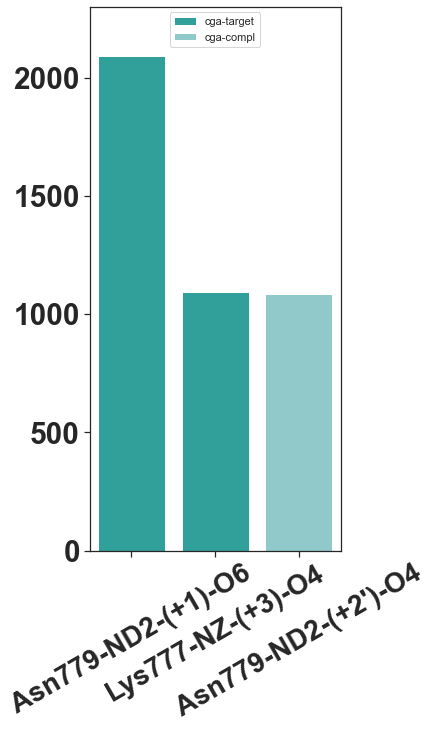

In [112]:
#palet=['#C71585','#DCDCDC', 'orange', 'lightseagreen']
palet=['lightseagreen','#87D3D3']

plt.figure(figsize=(4.5,10))
ax = sns.barplot(x="atom_atom", y="atom_atom_freq", hue="Strand", palette=palet, 
                 #order=axis_order,
                 dodge=False,
                 data=cga_sig)
plt.xticks(rotation=30)
plt.legend(loc='upper center')
plt.xticks(fontsize=28, fontweight='bold')
plt.yticks(fontsize=30, fontweight='bold')
plt.ylim(ymax = 2300, ymin = 0)
plt.xlabel('', fontsize=15, fontweight='bold')
plt.ylabel('',fontsize=15, fontweight='bold')
plt.title("",fontsize=20, fontweight='bold')

plt.savefig("Comp-3b-cga-atom-atom-c-flank-f.pdf", dpi=600, bbox_inches='tight', format="pdf")
